
## Density-Based Clustering on World Bank Dataset

Cluster Analysis with DBSCAN : Density-based spatial clustering of applications with noise.

DBSCAN is a method that identify distinctive clusters in the data, based on the key idea that a cluster is a group of high data point density, separated from other such clusters by regions of low data point density. The main idea is to find highly dense regions and consider them as one cluster. It can easily discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.

The DBSCAN algorithm uses two major parameters:

minPts: The minimum number of points (a threshold) clustered together for a region to be considered dense i.e. the minimum number of data points that can form a cluster
eps (ε): A distance measure that will be used to locate the points in the neighborhood of any point.
The algorithm takes care of two concepts called Density Reachability and Density Connectivity.

Density Reachability : A point to be reachable from another if it lies within a particular distance (eps) from it, which indicates how densely reachable a cluster is.
Density Connectivity: DBSCAN involves a transitivity based chaining-approach to determine whether points are located in a particular cluster. For example, a and d points could be connected if a->b->c->d, where p->q means q is in the neighborhood of p.



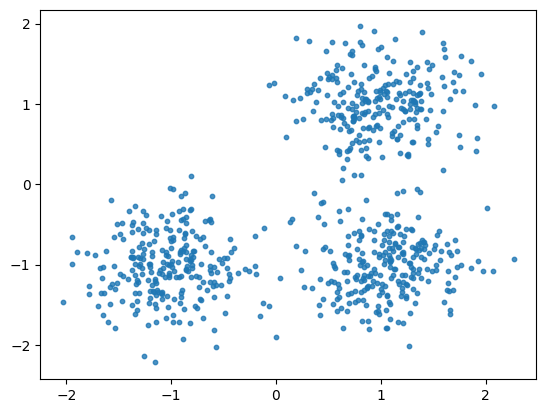

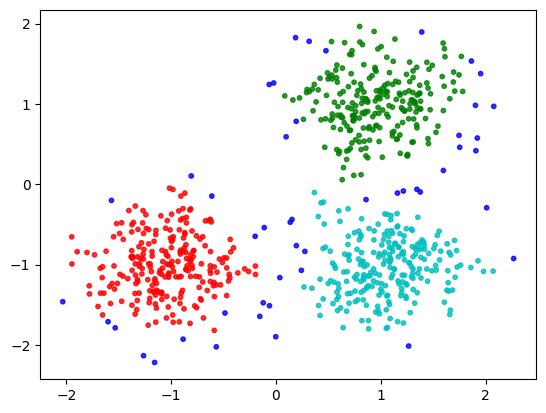

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import pandas as pd
import seaborn as sns

centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0) # play around with random_states 
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)
plt.show()

class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts # min num of points in eps radius
        self.epsilon = epsilon # radius 

    # helper functions 

    def eps_neighborhood(self, point):
        neighborhood = []
        for pt in range(len(self.dataset)):
            if np.linalg.norm(self.dataset[point] - self.dataset[pt]) <= self.epsilon:
                neighborhood.append(pt)
        return neighborhood
    
    def create_cluster_from(self, point, assignment, label):
        assignment[point] = label
        neighborhood = self.eps_neighborhood(point)
        
        while neighborhood:
            next_point = neighborhood.pop()
            if assignment[next_point] == label:
                continue
            assignment[next_point] = label
            if len(self.eps_neighborhood(next_point)) >= self.min_pts:
                neighborhood += self.eps_neighborhood(next_point)
            
        return assignment




    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.

        first step - sanity check by returning : [0 for l in range(len(self.dataset))]

        extended version - HDBSCAN
        """
        # core points - atleast 3 pts within eps radius 
        # boarder points - not within the eps region, present in the border of the cluster 
        # noise points - outliers 

        assignments = [0 for l in range(len(self.dataset))]
        label = 1

        for point in range(len(self.dataset)):
            if assignments[point] != 0:
                continue
            if len(self.eps_neighborhood(point)) >= self.min_pts:
                # we have found a core point
                assignments = self.create_cluster_from(point, assignments, label)
                label += 1



        return assignments 

clustering = DBC(X, 5, .2).dbscan()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[clustering].tolist(), s=10, alpha=0.8)
plt.show()

Next, we will import the World Bank dataset to perform our analysis.

In [13]:
df = pd.read_csv('world_bank_projects.csv')
df.head()

,id,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,pdo,impagency,cons_serv_reqd_ind,url,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
0,P500152,Europe and Central Asia,Republic of Turkiye,Pipeline,NaN,IPF Regular Project for ICR,Objective to be Determined.,NaN,NaN,http://projects.worldbank.org/P500152/null?lan...,...,NaN,NaN,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P500151,South Asia,Republic of India,Pipeline,NaN,PForR Project,Objective to be Determined.,NaN,NaN,http://projects.worldbank.org/P500151/null?lan...,...,NaN,NaN,Program-for-Results Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P252350,Eastern and Southern Africa,Republic of Rwanda,Active,Bank Approved,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,Ministry Of Education,NaN,http://projects.worldbank.org/P252350/null?lan...,...,NaN,Ministry of Finance and Economic Planning,Program-for-Results Financing,NaN,NaN,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
3,P252338,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Bank Approved,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,"Ministry of Public Works, Transport, and Commu...",NaN,http://projects.worldbank.org/P252338/null?lan...,...,NaN,Ministry of Finance,Investment Project Financing,B,NaN,Rural and Inter-Urban Roads,Public Administration - Transportation,NaN,NaN,NaN
4,P252337,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,Kenya National Bureau of Statistics,NaN,http://projects.worldbank.org/P252337/null?lan...,...,NaN,Kenya National Bureau of Statistics,Investment Project Financing,C,NaN,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization


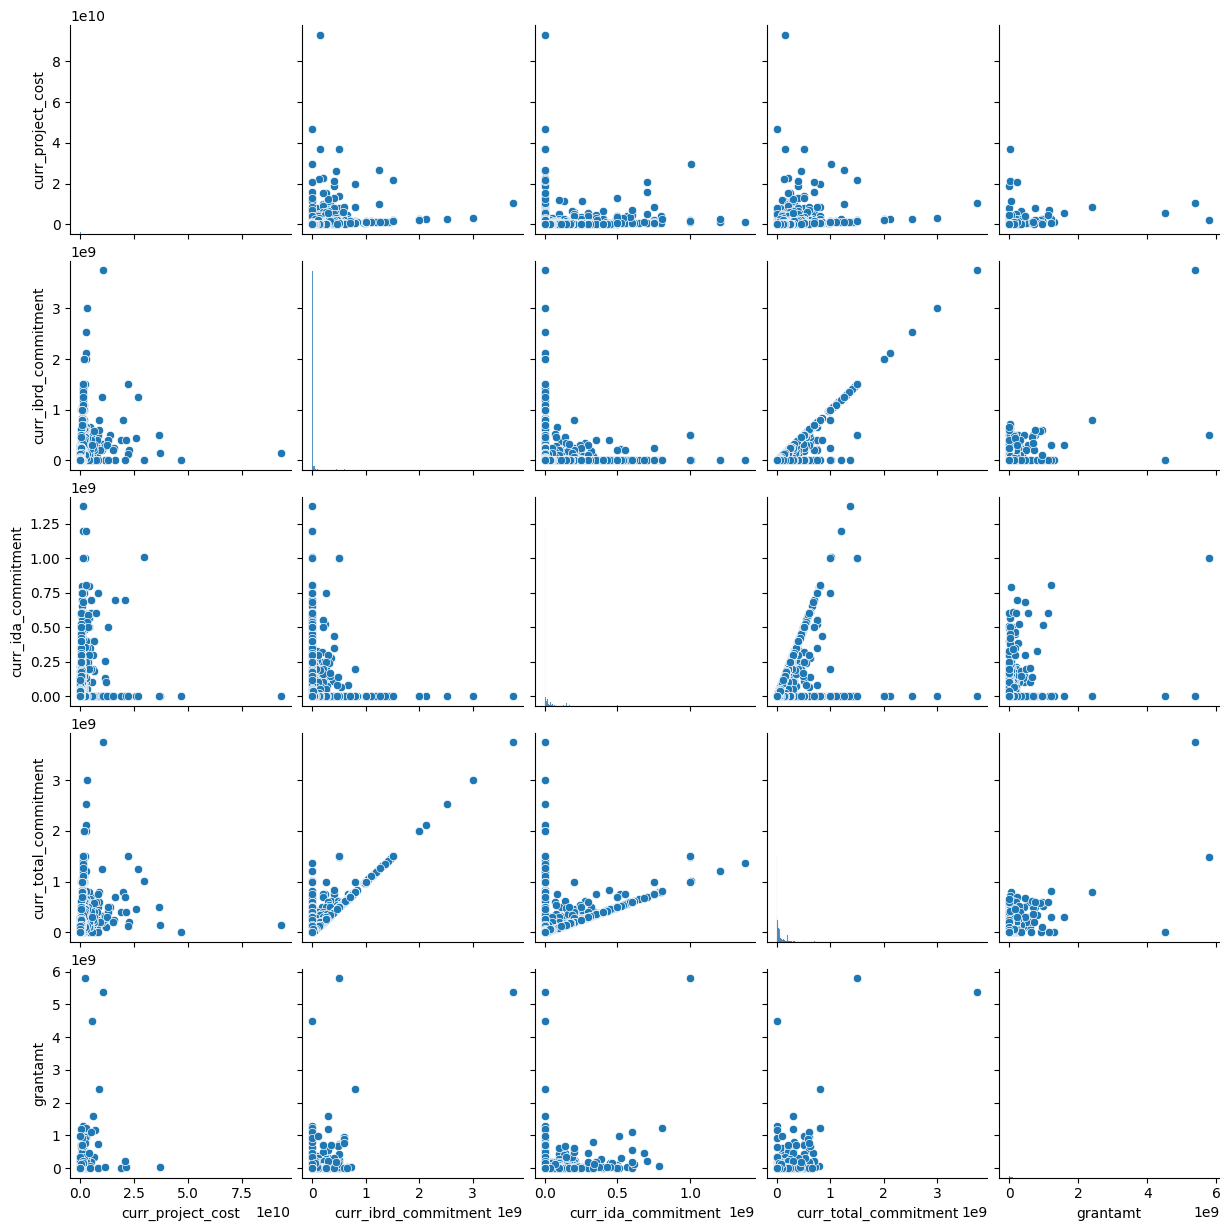

In [14]:
sns.pairplot(df)

In [15]:
from sklearn import metrics
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt



x=df.iloc[:,[2,3]].values
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

model=db.fit(x)
label=model.labels_
#identifying the points which makes up our core points
sample_cores= np.zeros_like(label,dtype=bool)

sample_cores[df.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

y_means = df.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')

plt.title('Clusters of data')
plt.show()



'"\n\nx=df.iloc[:,[2,3]].values\ndb=DBSCAN(eps=3,min_samples=4,metric=\'euclidean\')\n\nmodel=db.fit(x)\nlabel=model.labels_\n#identifying the points which makes up our core points\nsample_cores= np.zeros_like(label,dtype=bool)\n\nsample_cores[df.core_sample_indices_]=True\n\n#Calculating the number of clusters\n\nn_clusters=len(set(label))- (1 if -1 in label else 0)\nprint(\'No of clusters:\',n_clusters)\n\ny_means = df.fit_predict(x)\nplt.figure(figsize=(7,5))\nplt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = \'pink\')\nplt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = \'yellow\')\nplt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = \'cyan\')\nplt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = \'magenta\')\nplt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = \'orange\')\nplt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = \'blue\')\nplt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = \'red\')\np